In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score


In [2]:

df = pd.read_csv("Global_Pollution_Analysis.csv")
df.head()


,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [3]:

le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])


scaler = StandardScaler()
numeric_cols = ['Air_Pollution_Index', 'CO2_Emissions (in MT)', 'Industrial_Waste (in tons)', 'Energy_Consumption_Per_Capita (in MWh)', 'Energy_Recovered (in GWh)']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


df['Pollution_Category'] = pd.qcut(df['Air_Pollution_Index'], q=3, labels=[0, 1, 2])
df.head()


,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Pollution_Category
0,77,2005,1.376167,124.27,51.95,1.543328,-0.697051,-1.356325,41.11,37078.88,0.561742,42.22,20972.96,2
1,147,2001,-1.403578,60.34,117.22,0.124915,1.618760,-1.284276,36.44,33128.20,-0.756197,137.25,34850.41,0
2,136,2016,-1.330788,83.36,121.72,0.123888,1.560644,1.718910,9.38,18803.46,0.667825,124.47,57773.15,0
3,38,2018,1.494394,67.16,93.58,0.809131,-0.785350,-1.106232,18.97,9182.27,-1.556310,67.80,21837.51,2
4,46,2008,-0.021926,127.53,121.55,0.882681,-1.499375,-0.689181,34.00,39235.12,0.612087,186.52,41379.37,1


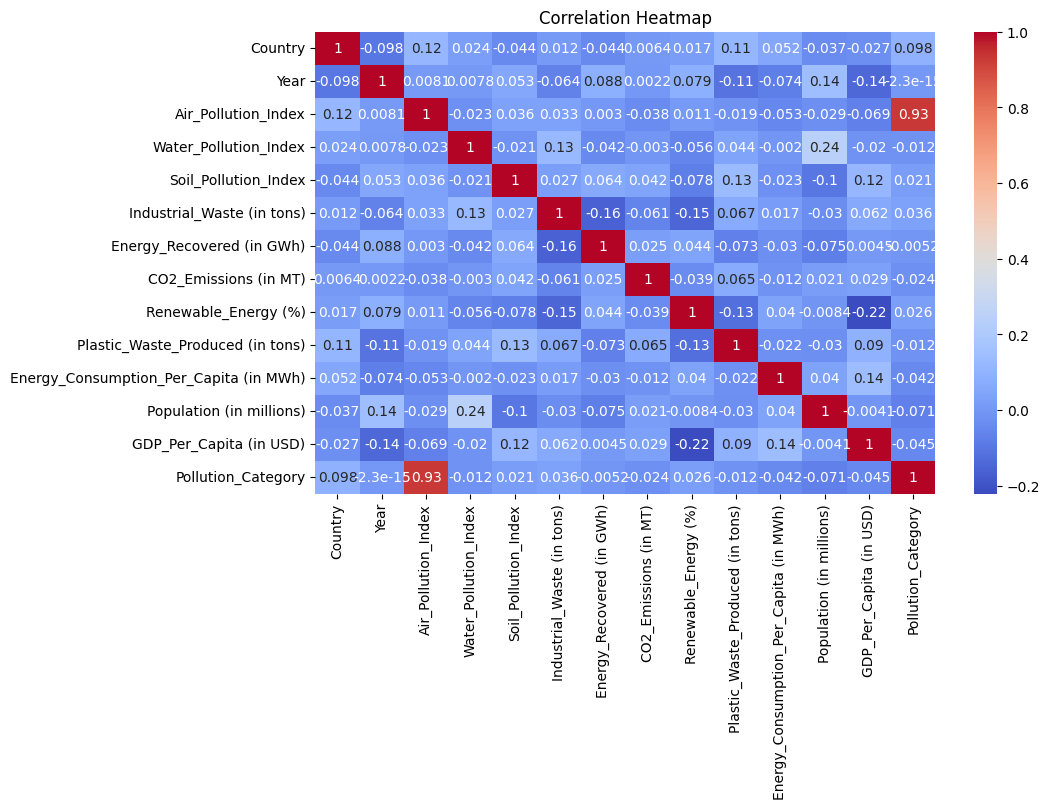

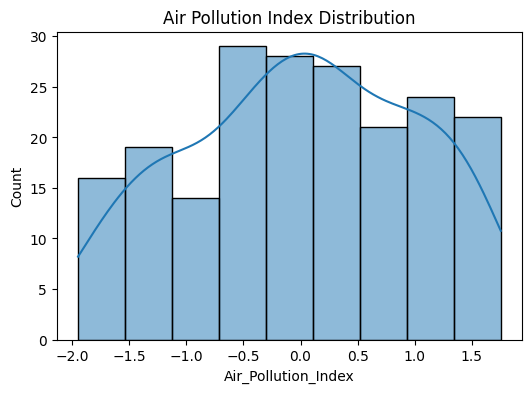

In [4]:

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


plt.figure(figsize=(6,4))
sns.histplot(df['Air_Pollution_Index'], kde=True)
plt.title("Air Pollution Index Distribution")
plt.show()


In [5]:

X_lr = df[['Air_Pollution_Index', 'CO2_Emissions (in MT)', 'Industrial_Waste (in tons)']]
y_lr = df['Energy_Recovered (in GWh)']

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train_lr)

y_pred_lr = lr_model.predict(X_test_lr)

print("R² Score:", r2_score(y_test_lr, y_pred_lr))
print("MSE:", mean_squared_error(y_test_lr, y_pred_lr))
print("MAE:", mean_absolute_error(y_test_lr, y_pred_lr))


R² Score: -0.02524886151206318
MSE: 1.1508794244423464
MAE: 0.9681919210617369


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


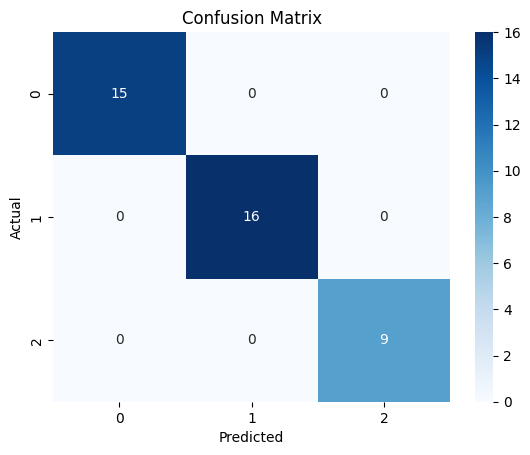

In [6]:

X_cls = df[['Air_Pollution_Index', 'CO2_Emissions (in MT)']]
y_cls = df['Pollution_Category'].astype(int)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_cls, y_train_cls)

y_pred_cls = log_model.predict(X_test_cls)

print("Accuracy:", accuracy_score(y_test_cls, y_pred_cls))
print("Precision:", precision_score(y_test_cls, y_pred_cls, average='weighted'))
print("Recall:", recall_score(y_test_cls, y_pred_cls, average='weighted'))
print("F1 Score:", f1_score(y_test_cls, y_pred_cls, average='weighted'))


conf_mat = confusion_matrix(y_test_cls, y_pred_cls)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
